In [14]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet


In [15]:
import plotly.io as pio
pio.renderers.default='colab'

In [16]:
df=pd.read_csv("TSLA.csv")

In [17]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400
1,2021-10-08,265.403320,265.459991,260.303345,261.829987,261.829987,50215800
2,2021-10-11,262.549988,267.079987,261.833344,263.980011,263.980011,42600900
3,2021-10-12,266.976654,270.773346,265.523346,268.573334,268.573334,66060000
4,2021-10-13,270.156677,271.803345,268.593323,270.359985,270.359985,42360300


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,300.097076,307.494683,291.963082,299.616957,299.616957,8.111980e+07
std,46.367420,46.992783,45.015139,46.083370,46.083370,2.531492e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.860824,273.379158,261.045006,267.203331,267.203331,6.391605e+07
50%,298.750000,304.158325,289.565002,296.856658,296.856658,7.808900e+07
75%,335.700004,344.957512,327.908341,336.472504,336.472504,9.436328e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


In [20]:
px.area(df,x="Date",y="Close")

In [21]:
px.line(df,x="Date",y="Close")

In [22]:
px.area(df,x="Date",y="Volume")

In [23]:
px.bar(df, y='Volume')

In [24]:
px.box(df,y="Close")

In [26]:
columns =['Date',"Close"]
ndf = pd.DataFrame(df,columns=columns)

In [27]:
ndf

,Date,Close
0,2021-10-07,264.536682
1,2021-10-08,261.829987
2,2021-10-11,263.980011
3,2021-10-12,268.573334
4,2021-10-13,270.359985
...,...,...
247,2022-09-30,265.250000
248,2022-10-03,242.399994
249,2022-10-04,249.440002
250,2022-10-05,240.809998


In [28]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [29]:
prophet_df

,ds,y
0,2021-10-07,264.536682
1,2021-10-08,261.829987
2,2021-10-11,263.980011
3,2021-10-12,268.573334
4,2021-10-13,270.359985
...,...,...
247,2022-09-30,265.250000
248,2022-10-03,242.399994
249,2022-10-04,249.440002
250,2022-10-05,240.809998


In [30]:
m =Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-07,331.492698,300.563355,388.170170,331.492698,331.492698,11.214218,11.214218,11.214218,11.214218,11.214218,11.214218,0.0,0.0,0.0,342.706916
1,2021-10-08,331.387709,295.595620,384.349068,331.387709,331.387709,10.331515,10.331515,10.331515,10.331515,10.331515,10.331515,0.0,0.0,0.0,341.719224
2,2021-10-11,331.072743,303.014678,393.766728,331.072743,331.072743,16.795968,16.795968,16.795968,16.795968,16.795968,16.795968,0.0,0.0,0.0,347.868711
3,2021-10-12,330.967754,302.047251,387.998546,330.967754,330.967754,13.636802,13.636802,13.636802,13.636802,13.636802,13.636802,0.0,0.0,0.0,344.604556
4,2021-10-13,330.862765,302.482799,387.398070,330.862765,330.862765,15.252960,15.252960,15.252960,15.252960,15.252960,15.252960,0.0,0.0,0.0,346.115725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2022-12-01,276.922523,244.250070,329.604984,273.461859,280.406013,11.214218,11.214218,11.214218,11.214218,11.214218,11.214218,0.0,0.0,0.0,288.136741
308,2022-12-02,277.087709,243.765187,331.338013,273.585364,280.635845,10.331515,10.331515,10.331515,10.331515,10.331515,10.331515,0.0,0.0,0.0,287.419225
309,2022-12-03,277.252896,199.605208,287.762456,273.586066,280.866278,-33.615732,-33.615732,-33.615732,-33.615732,-33.615732,-33.615732,0.0,0.0,0.0,243.637164
310,2022-12-04,277.418082,201.337260,287.283658,273.669743,281.134271,-33.615732,-33.615732,-33.615732,-33.615732,-33.615732,-33.615732,0.0,0.0,0.0,243.802350


In [33]:
px.line(forecast,x='ds',y='yhat')

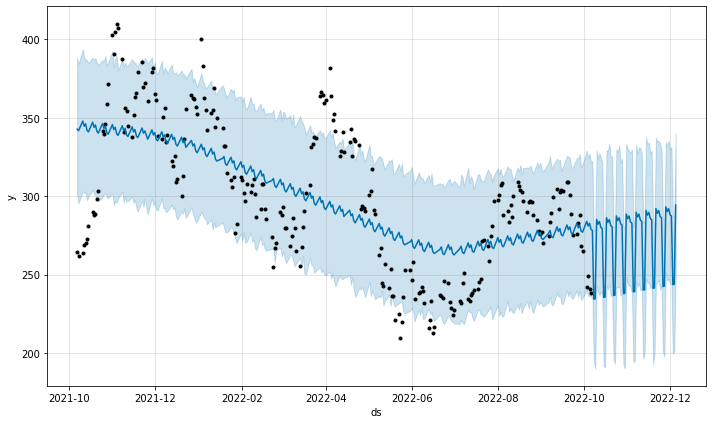

In [34]:
figure = m.plot(forecast,xlabel='ds',ylabel="y")

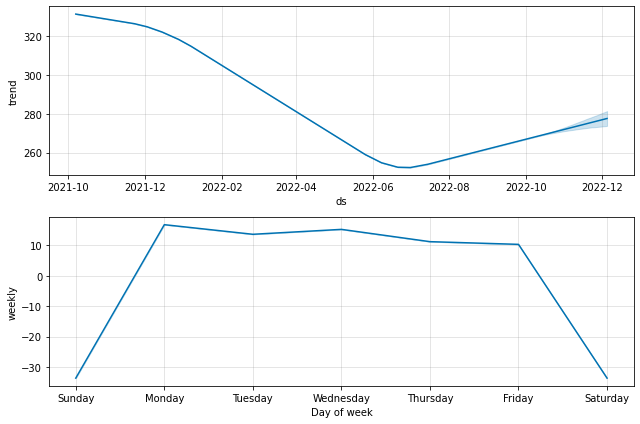

In [35]:
figure = m.plot_components(forecast)

In [36]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 134 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638647 sha256=1a92eaf312059d53a3574303d6aa527be427eee8f5347a5d341800d821ceae85
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
